<a href="https://colab.research.google.com/github/Faizack/Clone/blob/main/timeseriesPartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


from sklearn.linear_model import LogisticRegression


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
yearly_data = pd.read_csv('/content/nity18442004.csv')
yearly_data.index.name = 'Year'
yearly_data.index = pd.Index(range(1844, 2005), name='Year')
yearly_data.head()

,x
Year,
1844,8.5
1845,8.3
1846,9.7
1847,8.9
1848,8.5


In [ ]:
monthly_data = pd.read_csv('/content/nitm18442004.csv')

monthly_data.index.name = 'Months'
yearly_data.index = pd.Index(range(1844, 2005), name='Year')
yearly_data.head()

,x
Year,
1844,8.5
1845,8.3
1846,9.7
1847,8.9
1848,8.5


In [ ]:
print("yearly_data.head()")
yearly_data.head()

yearly_data.head()


,x
Year,
1844,8.5
1845,8.3
1846,9.7
1847,8.9
1848,8.5


In [ ]:
print("yearly_data.shape :",yearly_data.shape)

yearly_data.shape : (161, 1)


In [ ]:
print("monthly_data.head()")
monthly_data.head()

monthly_data.head()


,x
Months,
0,4.5
1,2.4
2,4.8
3,9.1
4,10.9


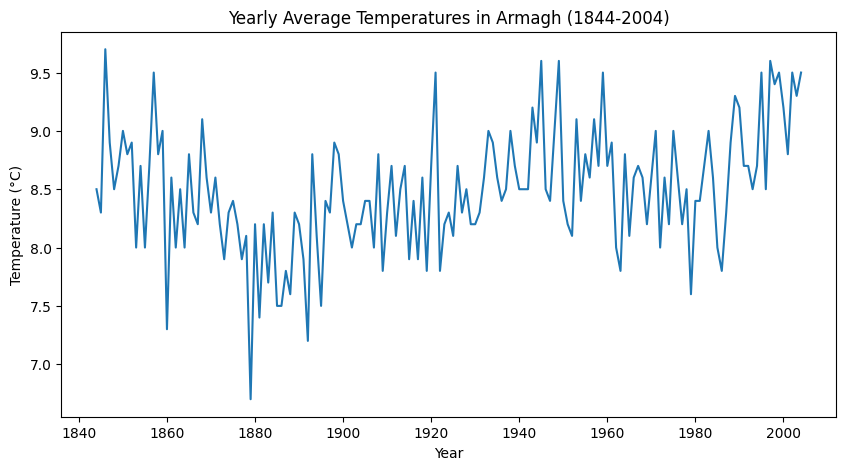

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(yearly_data.index, yearly_data['x'])
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Yearly Average Temperatures in Armagh (1844-2004)')
plt.show()

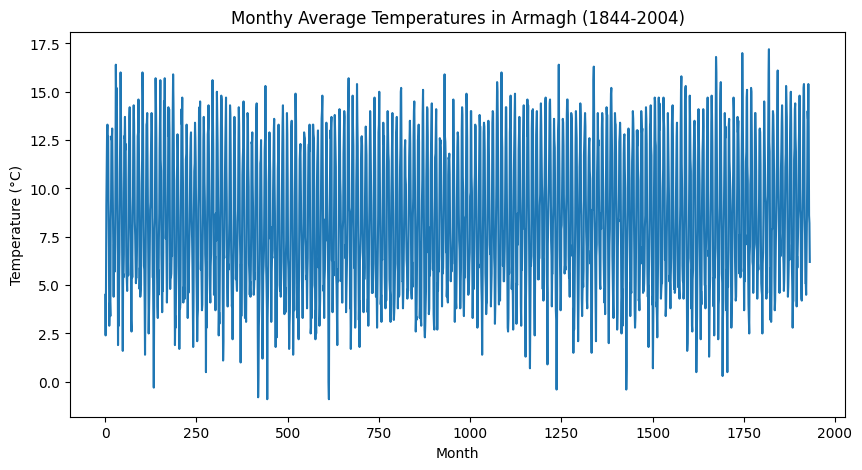

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_data.index, monthly_data['x'])
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Monthy Average Temperatures in Armagh (1844-2004)')
plt.show()

1. **Exponential Smoothing**:



In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare the data
yearly_train = yearly_data.iloc[:-1]
yearly_test = yearly_data.iloc[-1:]
monthly_train = monthly_data.iloc[:-12]
monthly_test = monthly_data.iloc[-12:]

# Exponential smoothing for yearly data
fit1 = ExponentialSmoothing(yearly_train['x'], seasonal_periods=12, trend='add', seasonal='add').fit()

# Exponential smoothing for monthly data
fit2 = ExponentialSmoothing(monthly_train['x'], seasonal_periods=12, trend='add', seasonal='add').fit()

# Forecast the temperature for 2004
yearly_forecast = fit1.forecast(1)
monthly_forecast = fit2.forecast(12)

# Print the forecasts
print('Yearly Forecast:', yearly_forecast.values[0])
print('Monthly Forecast:', monthly_forecast.values)

# Evaluate the Exponential Smoothing models
print('Exponential Smoothing Yearly MAE:', mean_absolute_error(yearly_test['x'], yearly_forecast))
print('Exponential Smoothing Yearly RMSE:', np.sqrt(mean_squared_error(yearly_test['x'], yearly_forecast)))
print('Exponential Smoothing Yearly MAPE:', np.mean(np.abs((yearly_test['x'] - yearly_forecast) / yearly_test['x'])) * 100)

print('Exponential Smoothing Monthly MAE:', mean_absolute_error(monthly_test['x'], monthly_forecast))
print('Exponential Smoothing Monthly RMSE:', np.sqrt(mean_squared_error(monthly_test['x'], monthly_forecast)))
print('Exponential Smoothing Monthly MAPE:', np.mean(np.abs((monthly_test['x'] - monthly_forecast) / monthly_test['x'])) * 100)

Yearly Forecast: 9.189481210226642
Monthly Forecast: [ 4.79476575  4.98726568  5.91352464  7.90725781 10.4985183  13.18788104
 14.5478991  14.50977251 12.66476775  9.81852897  6.8228994   5.3085074 ]
Exponential Smoothing Yearly MAE: 0.3105187897733579
Exponential Smoothing Yearly RMSE: 0.3105187897733579
Exponential Smoothing Yearly MAPE: 3.2686188397195566
Exponential Smoothing Monthly MAE: 0.6954832633270082
Exponential Smoothing Monthly RMSE: 0.7863688515016878
Exponential Smoothing Monthly MAPE: 7.999705847250533


The output shows the  forecasts and evaluate the models for 2004 for both yearly and monthly time series

2. ARIMA/SARIMA:



In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ARIMA for yearly data
model1 = ARIMA(yearly_train['x'], order=(1,1,1)).fit()

# SARIMA for monthly data
model2 = SARIMAX(monthly_train['x'], order=(1,1,1), seasonal_order=(1,1,1,12)).fit()

# Forecast the temperature for 2004
yearly_forecast2 = model1.forecast(1)
monthly_forecast2 = model2.forecast(12)

# Print the forecasts
print('Yearly Forecast:', yearly_forecast2.values[0])
print('Monthly Forecast:', monthly_forecast2.values)


# Evaluate the ARIMA and SARIMA models
print('ARIMA Yearly MAE:', mean_absolute_error(yearly_test['x'], yearly_forecast2))
print('ARIMA Yearly RMSE:', np.sqrt(mean_squared_error(yearly_test['x'], yearly_forecast2)))
print('ARIMA Yearly MAPE:', np.mean(np.abs((yearly_test['x'] - yearly_forecast2) / yearly_test['x'])) * 100)

print('SARIMA Monthly MAE:', mean_absolute_error(monthly_test['x'], monthly_forecast2))
print('SARIMA Monthly RMSE:', np.sqrt(mean_squared_error(monthly_test['x'], monthly_forecast2)))
print('SARIMA Monthly MAPE:', np.mean(np.abs((monthly_test['x'] - monthly_forecast2) / monthly_test['x'])) * 100)

Yearly Forecast: 9.161766448758279
Monthly Forecast: [ 4.61454491  4.78743686  6.03072539  7.81370593 10.45120037 13.01243069
 14.59980808 14.54189024 12.64259291  9.9837039   6.8674043   5.29036168]
ARIMA Yearly MAE: 0.3382335512417214
ARIMA Yearly RMSE: 0.3382335512417214
ARIMA Yearly MAPE: 3.5603531709654885
SARIMA Monthly MAE: 0.7255077023724258
SARIMA Monthly RMSE: 0.8258923302062566
SARIMA Monthly MAPE: 8.169457962691471


The output shows the  forecasts and evaluate the models for 2004 for both yearly and monthly time series

3. Simple Time Series Model for yearly data

In [ ]:
# Simple Time Series Model for yearly data
yearly_forecast1 = yearly_train['x'].rolling(window=5).mean().iloc[-1]


# Simple Time Series Model for monthly data
monthly_forecast1 = monthly_train['x'].rolling(window=12).mean().iloc[-12:]

# Print the forecasts
print('Yearly Forecast:', yearly_forecast1)
print('Monthly Forecast:', monthly_forecast1.values)

# Evaluate the Simple Time Series models

print('Simple Time Series Yearly RMSE:', np.sqrt(mean_squared_error(yearly_test['x'], [yearly_forecast1])))
print('Simple Time Series Yearly MAPE:', np.mean(np.abs((yearly_test['x'] - yearly_forecast1) / yearly_test['x'])) * 100)

Yearly Forecast: 9.26
Monthly Forecast: [9.3        9.15833333 9.11666667 9.18333333 9.15       9.21666667
 9.36666667 9.41666667 9.40833333 9.375      9.30833333 9.3       ]
Simple Time Series Yearly RMSE: 0.2400000000000002
Simple Time Series Yearly MAPE: 2.5263157894736867


The output shows the  forecasts and evaluate the models for 2004 for both yearly and monthly time series